<a href="https://colab.research.google.com/github/j-buss/wi-dpi-analysis/blob/development/4.0_Gold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salary and Education in Wisconsin - 4.0 Gold Layer

This it the 4th in a series of notebooks depicting the steps to acquire, store and analyze data pertaining to teachers in Wisconsin.



1.   List item
2.   List item
3.   Refined Data - Create ***all_staff_record*** tables by year

## Prep

In [1]:
!pip install --upgrade google-cloud-bigquery

Requirement already up-to-date: google-cloud-bigquery in /usr/local/lib/python3.6/dist-packages (1.12.1)


### Import Libraries

In [0]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 15)
import seaborn as sns
import matplotlib.pyplot as plt

from google.cloud import bigquery

In [0]:
%matplotlib inline
plt.style.use('bmh')

### Functions

In [0]:
def create_dataset(client, project_id, dataset_name):
  
  
  dataset_id = "{}.{}".format(project_id, dataset_name)
  dataset = bigquery.Dataset(dataset_id)
  dataset.location = "US"

  dataset = client.create_dataset(dataset)
  print("Created dataset {}.{}".format(client.project, dataset.dataset_id))

## Processing

In [0]:
# Authenticate to GCS.
from google.colab import auth
auth.authenticate_user()

In [0]:
project_id='wi-dpi-010'
landing_dataset_name='landing'
refined_dataset_name='refined'
gold_dataset_name='gold'

In [0]:
bq_client = bigquery.Client(project=project_id)

In [0]:
#Create Refined Dataset - Likely already done
#create_dataset(bq_client, project_id, gold_dataset_name)

### Analysis

In [0]:
sql_query = '''
  SELECT
    *
  FROM
    {}.{}
'''.format(refined_dataset_name, "2015_all_staff_report")

In [16]:
df = pd.read_gbq(sql_query,project_id=project_id)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value for dialect is changing to "standard" in a future version of pandas-gbq. Pass in dialect="legacy" to disable this warning.
  """Entry point for launching an IPython kernel.


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173824 entries, 0 to 173823
Data columns (total 39 columns):
id_nbr                     173824 non-null int64
first_name                 173824 non-null object
last_name                  173824 non-null object
file_number                138678 non-null object
gender                     173824 non-null object
race_ethnicity             173824 non-null object
birth_year                 173824 non-null int64
high_degree_cd             104466 non-null object
high_degree_desc           104466 non-null object
year_session               173824 non-null object
contract_days              173824 non-null int64
local_exp                  103834 non-null float64
total_exp                  103834 non-null float64
salary                     173824 non-null float64
benefits                   173824 non-null float64
staff_category_cd          173823 non-null object
staff_category_desc        173823 non-null object
school_cd                  173824 non-

In [26]:
df['salary'].describe()

count    173824.000000
mean      31774.674447
std       29156.121042
min           0.000000
25%           0.000000
50%       38103.000000
75%       55250.000000
max      237354.000000
Name: salary, dtype: float64

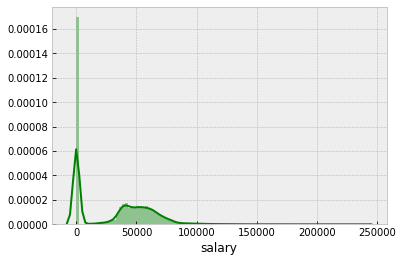

In [21]:
sns.distplot(df['salary'], color='g', bins=100, hist_kws={'alpha': 0.4})

Initial analysis on salary shows some values which are outliers:


*   Individuals with salary of $0
*   Individuals wiht maxium salary



In [28]:
df[df['salary'] == df['salary'].min()][0:5]

,id_nbr,first_name,last_name,file_number,gender,race_ethnicity,birth_year,high_degree_cd,high_degree_desc,year_session,contract_days,local_exp,total_exp,salary,benefits,staff_category_cd,staff_category_desc,school_cd,position_cd,position_description,position_type_cd,position_type_desc,assignment_area_cd,assignment_area_desc,low_grade_cd,low_grade_desc,high_grade_cd,high_grade_desc,assignment_fte,school_name,grade_level_cd,grade_level_desc,cesa_number,cnty_name,school_mailing_address1,school_mailing_address2,mail_city,mail_st,mail_zip_cd
133,383408,Meredith,Biba,658224,F,W,1981,5,Master's degree,2015R,0,NaN,NaN,0.0,0.0,1,Professional-Regular Education,,17,Reading Specialist,L,Licensed,0,No Description Beyond Position,K4,4-year-old Kindergarten,12,Twelfth Grade,0.2,Wauzeka-Steuben Sch Dist,None,None,3,Crawford County,301 E Main St,Wauzeka WI 53826-9671,Wauzeka,WI,53826-9671
135,364523,Kim,Duncan,83253,F,W,1957,None,None,2015R,0,NaN,NaN,0.0,0.0,2,Short-Term Substitute/Extra Curricular Activities,,43,Short Term Substitute Teacher,L,Licensed,0,No Description Beyond Position,K4,4-year-old Kindergarten,12,Twelfth Grade,NaN,Adams-Friendship Area Sch Dist,None,None,5,Adams County,201 W 6th St,Friendship WI 53934-9135,Friendship,WI,53934-9135
136,407208,Louise,Walter,630125,F,W,1957,None,None,2015R,0,NaN,NaN,0.0,0.0,2,Short-Term Substitute/Extra Curricular Activities,,43,Short Term Substitute Teacher,L,Licensed,0,No Description Beyond Position,K4,4-year-old Kindergarten,12,Twelfth Grade,NaN,Adams-Friendship Area Sch Dist,None,None,5,Adams County,201 W 6th St,Friendship WI 53934-9135,Friendship,WI,53934-9135
137,371248,Lorie,Hodkiewicz,736763,F,W,1964,None,None,2015R,0,NaN,NaN,0.0,0.0,2,Short-Term Substitute/Extra Curricular Activities,,43,Short Term Substitute Teacher,L,Licensed,0,No Description Beyond Position,K4,4-year-old Kindergarten,12,Twelfth Grade,NaN,Adams-Friendship Area Sch Dist,None,None,5,Adams County,201 W 6th St,Friendship WI 53934-9135,Friendship,WI,53934-9135
138,314308,Karen,Weisenbeck,184792,F,W,1956,None,None,2015R,0,NaN,NaN,0.0,0.0,2,Short-Term Substitute/Extra Curricular Activities,,43,Short Term Substitute Teacher,L,Licensed,0,No Description Beyond Position,K4,4-year-old Kindergarten,12,Twelfth Grade,NaN,Adams-Friendship Area Sch Dist,None,None,5,Adams County,201 W 6th St,Friendship WI 53934-9135,Friendship,WI,53934-9135


In [24]:
df[df['salary'] == df['salary'].max()]

,id_nbr,first_name,last_name,file_number,gender,race_ethnicity,birth_year,high_degree_cd,high_degree_desc,year_session,contract_days,local_exp,total_exp,salary,benefits,staff_category_cd,staff_category_desc,school_cd,position_cd,position_description,position_type_cd,position_type_desc,assignment_area_cd,assignment_area_desc,low_grade_cd,low_grade_desc,high_grade_cd,high_grade_desc,assignment_fte,school_name,grade_level_cd,grade_level_desc,cesa_number,cnty_name,school_mailing_address1,school_mailing_address2,mail_city,mail_st,mail_zip_cd
7881,377814,Jennifer,Cheatham,751701,F,W,1971,7,Doctorate,2015R,260,2.5,8.5,237354.0,56567.0,1,Professional-Regular Education,,5,District Administrator,A,Administrative,0,No Description Beyond Position,K4,4-year-old Kindergarten,12,Twelfth Grade,1.0,Madison Metropolitan Sch Dist,None,None,2,Dane County,545 W Dayton St,Madison WI 53703-1967,Madison,WI,53703-1967
